In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import folium
from folium.plugins import HeatMap

In [4]:
df=pd.read_csv("US_Accidents_March23.csv")

In [5]:
df.sample(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
81905,A-81912,Source2,2,2016-10-06 02:35:48,2016-10-06 03:20:26,34.075500,-117.907738,NaN,NaN,0.000,...,False,True,False,False,True,False,Night,Night,Night,Night
416335,A-416348,Source2,2,2017-04-10 22:25:48,2017-04-10 22:55:30,41.849045,-88.091911,NaN,NaN,0.000,...,False,False,True,False,False,False,Night,Night,Night,Night
4824450,A-4861064,Source1,2,2022-09-30 17:55:15.000000000,2022-09-30 19:10:21.000000000,39.008289,-78.302742,39.007026,-78.304919,0.146,...,False,False,False,False,False,False,Day,Day,Day,Day
4324701,A-4357403,Source1,2,2022-08-12 14:59:44.000000000,2022-08-12 16:17:31.000000000,40.141952,-75.161733,40.135858,-75.178720,0.991,...,False,False,False,False,False,False,Day,Day,Day,Day
987836,A-997602,Source2,3,2021-06-19 16:45:11,2021-06-19 18:05:35,32.986385,-87.789314,NaN,NaN,15.650,...,False,False,False,False,False,False,Day,Day,Day,Day


In [10]:
dfnew = df[['Start_Lat', 'Start_Lng']]
map_center = [dfnew['Start_Lat'].mean(), dfnew['Start_Lng'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=6)
HeatMap(data=dfnew[['Start_Lat', 'Start_Lng']].values, radius=8).add_to(accident_map)
accident_map.save('accident_hotspots_map.html')

In [11]:
dfnew = df[df['Severity'] >= 3][['Start_Lat', 'Start_Lng']]
map_center = [dfnew['Start_Lat'].mean(), dfnew['Start_Lng'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=6)
HeatMap(data=dfnew[['Start_Lat', 'Start_Lng']].values, radius=8).add_to(accident_map)
accident_map.save('accident_hotspots_map_severty>3.html')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

<Axes: xlabel='Severity'>

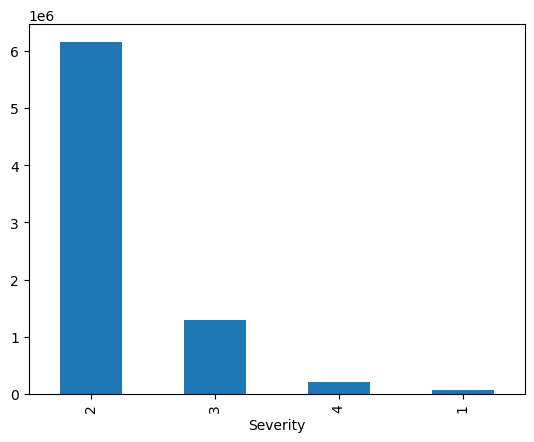

In [7]:
df['Severity'].value_counts().plot(kind='bar')

there are extremly highy cases of severity when related to 3 4 and 1

In [8]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'],errors='coerce')

<Axes: xlabel='Start_Time'>

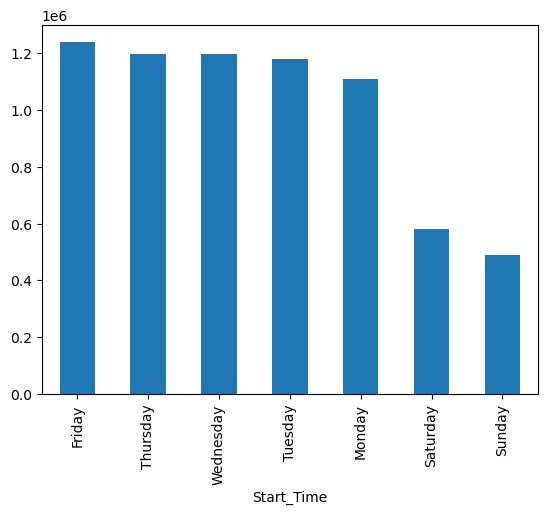

In [9]:
df['Start_Time'].dt.day_name().value_counts().plot(kind='bar')

from this we can see the accidents are more on the working days when compared to weekends

<Axes: xlabel='Start_Time'>

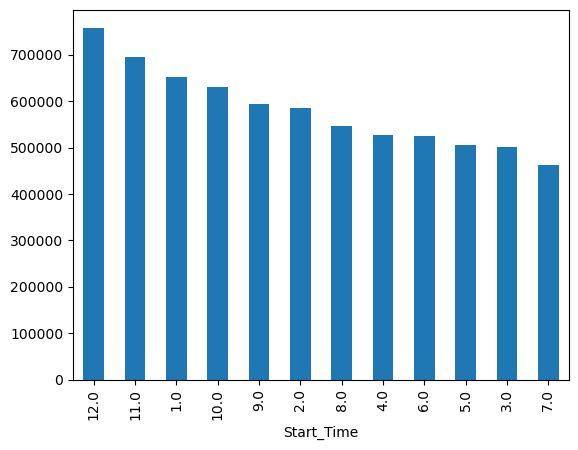

In [10]:
df['Start_Time'].dt.month.value_counts().plot(kind='bar')

from above graph we can say the accidents are heavy at starting and the last of the year and less between the reason maybe there are summer holidays in between months of the year most of them may go to trips.

<Axes: xlabel='Start_Time'>

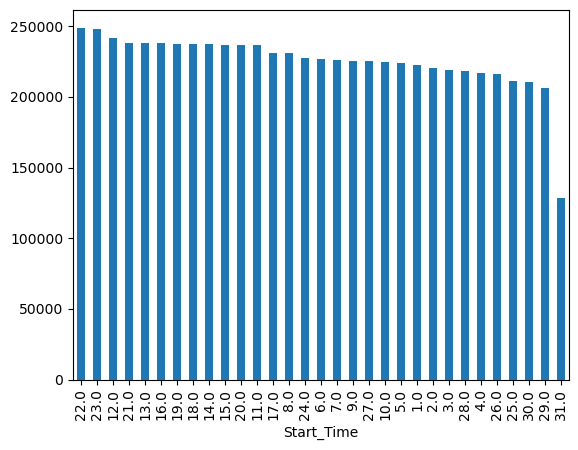

In [11]:
df['Start_Time'].dt.day.value_counts().plot(kind='bar')

it is almost same as same in all the days

<Axes: xlabel='Start_Time'>

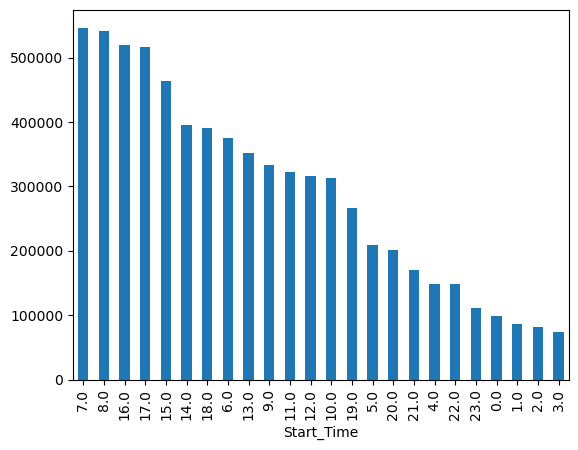

In [12]:
df['Start_Time'].dt.hour.value_counts().plot(kind='bar')

from this we can observe that heavy hours like 7-9 and 15-18 we have more accidents as everyone will be going to work and coming from work.Very less in late nights and early mornings as they are sleeping hours.

In [13]:
df['End_Time'] = pd.to_datetime(df['End_Time'],errors='coerce')

<Axes: xlabel='End_Time'>

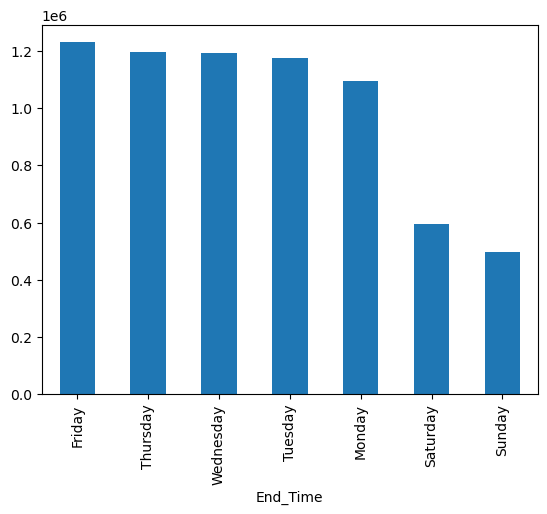

In [14]:
df['End_Time'].dt.day_name().value_counts().plot(kind='bar')

it is almost same as the accident will start and end on the same date

In [15]:
df['Distance(mi)'].skew()

20.385758760874868

In [16]:
percentile25=df['Distance(mi)'].quantile(0.25)
percentile75=df['Distance(mi)'].quantile(0.75)
iqr=percentile75-percentile25
upperlimit=percentile75+1.5*iqr
lowerlimit=percentile25-1.5*iqr
print((df['Distance(mi)']>upperlimit).sum())
print((df['Distance(mi)']<lowerlimit).sum())

963606
0


In [17]:
df.loc[df['Distance(mi)'] > upperlimit, 'Distance(mi)'] = upperlimit

<Axes: ylabel='Distance(mi)'>

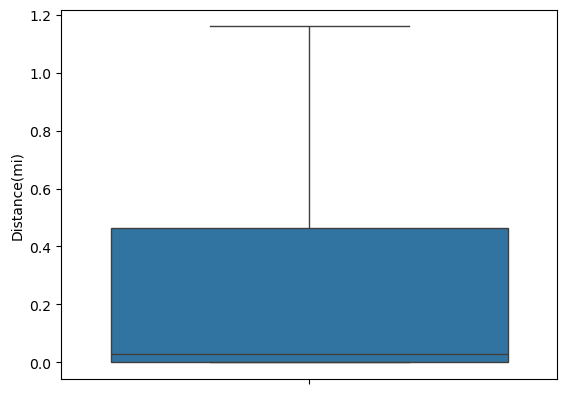

In [18]:
sns.boxplot(df['Distance(mi)'])

after removing outliers we can see that the most of the accident distances were near to 0.01 miles and more than 75% were less than 0.5 miles 

<Axes: xlabel='Distance(mi)', ylabel='Density'>

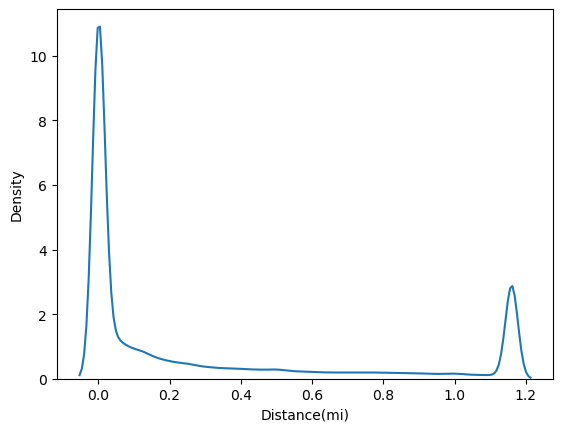

In [19]:
sns.kdeplot(data=df,x='Distance(mi)')

from above graph we can observe that 0 to 0.1 there are most of accidents after that 1.1 to 1.2 

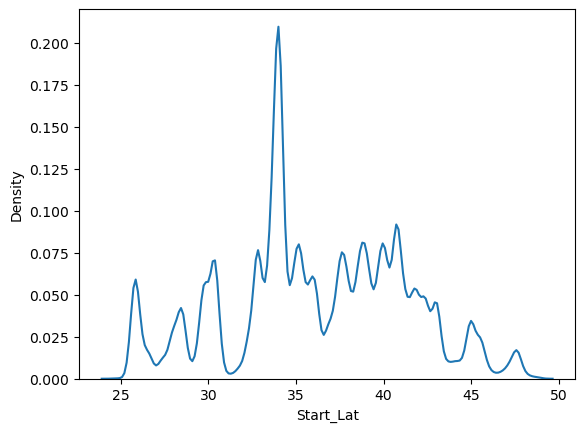

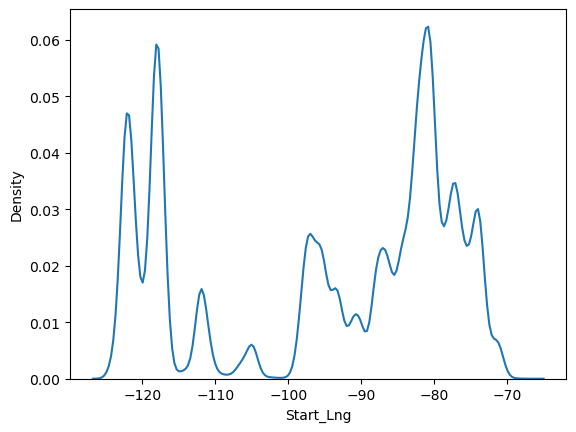

In [20]:
plt.figure()
sns.kdeplot(data=df,x='Start_Lat')
plt.figure()
sns.kdeplot(data=df,x='Start_Lng')
plt.show()

from this we can observe that there are high accidents at 33- 35 latitude. we can also observe most of the accidents are at long -115 to -125 and -80 to --85

In [21]:
print(df['Description'].nunique())

3761578


In [22]:
print(df['Street'].nunique())

336306


<Axes: xlabel='Street'>

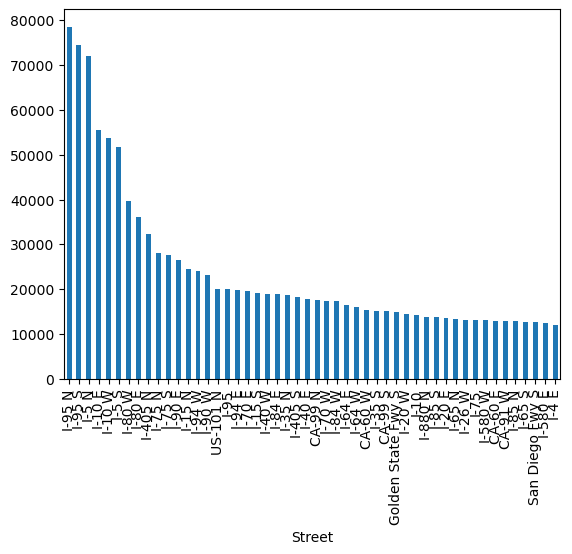

In [23]:
df['Street'].value_counts().head(50).plot(kind='bar')

from this we can see in which street most of the accidents take place

In [24]:
df['Day']=df['Start_Time'].dt.day_name()
df['Time']=df['Start_Time'].dt.hour

<Axes: xlabel='Street', ylabel='count'>

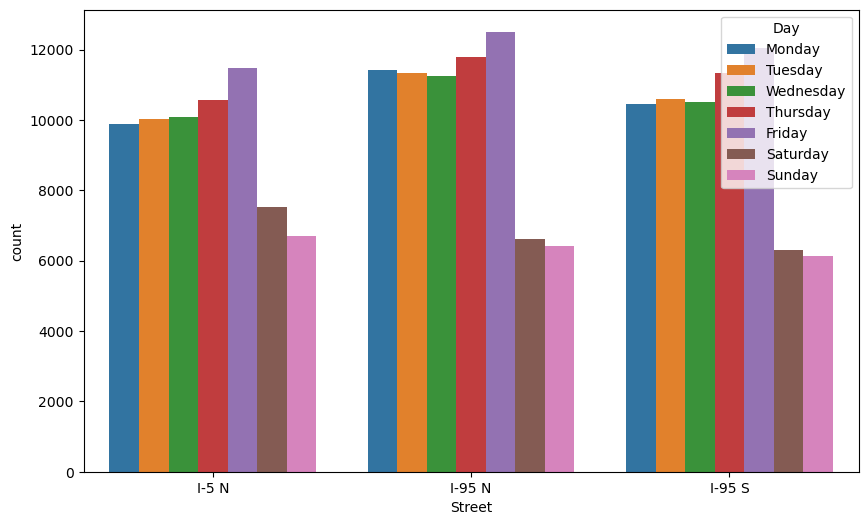

In [25]:

top_streets = df['Street'].value_counts().head(3).index
filtered_df = df[df['Street'].isin(top_streets)]
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
sns.countplot( x=filtered_df['Street'], hue=filtered_df['Day'], hue_order=day_order)


on top streets the accidents are more on the working days then the weekends

<Axes: xlabel='Street', ylabel='count'>

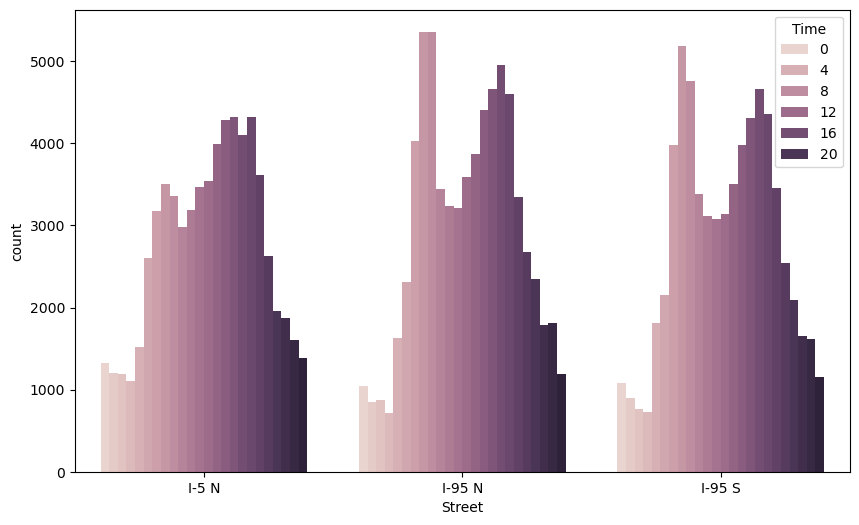

In [26]:

plt.figure(figsize=(10, 6))
sns.countplot( x=filtered_df['Street'], hue=filtered_df['Time'])

from this we can observe in this streets also most of the accidents were from 6-9 and 14-18

In [27]:
df['City'].nunique()

13678

<Axes: xlabel='City'>

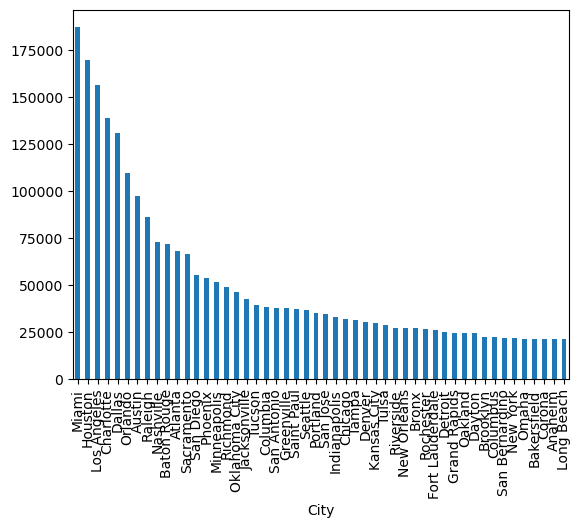

In [28]:
df['City'].value_counts().head(50).plot(kind='bar')

we can see the top 50 cities where more accidents take place.

1871


<Axes: xlabel='County'>

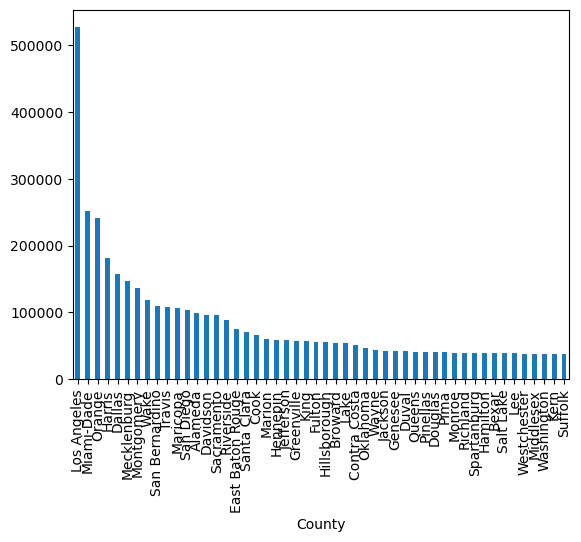

In [29]:
print(df['County'].nunique())
df['County'].value_counts().head(50).plot(kind='bar')

from the above graph we can see the top 50 county's with most accidents.

49


<Axes: xlabel='State'>

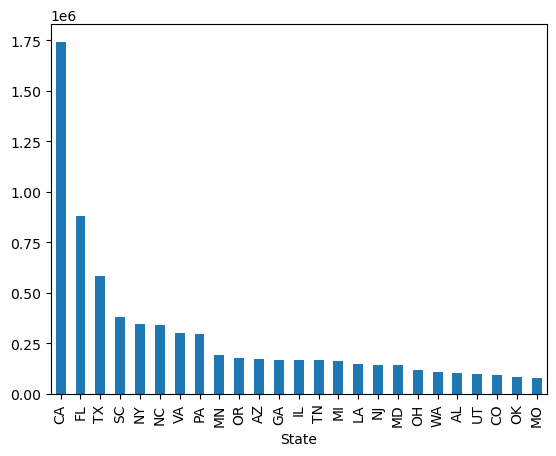

In [30]:
print(df['State'].nunique())
df['State'].value_counts().head(25).plot(kind='bar')

from the above we can see all states with the ordering of most accidents.

825094


<Axes: xlabel='Zipcode'>

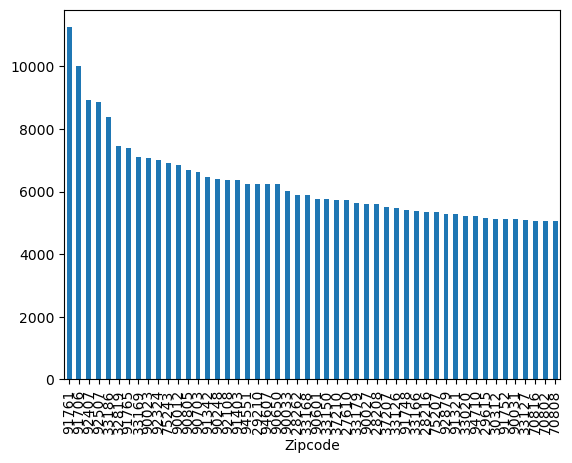

In [31]:
print(df['Zipcode'].nunique())
df['Zipcode'].value_counts().head(50).plot(kind='bar')

from the above graph we can see top 50 zipcode with most accidents.

2045


<Axes: xlabel='Airport_Code'>

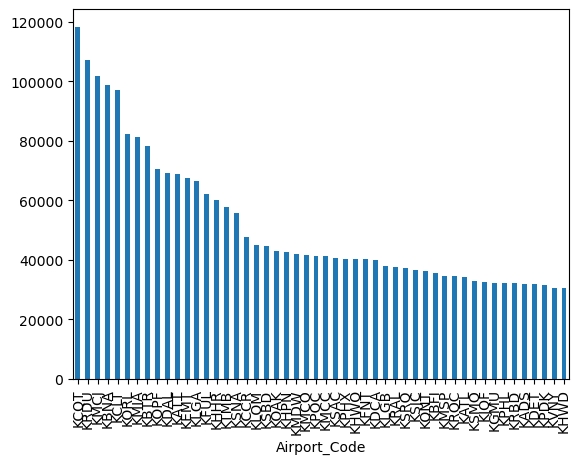

In [32]:
print(df['Airport_Code'].nunique())
df['Airport_Code'].value_counts().head(50).plot(kind='bar')

from the above graph we can see top 50 airport_code with most accidents

In [33]:
percentile25=df['Temperature(F)'].quantile(0.25)
percentile75=df['Temperature(F)'].quantile(0.75)
iqr=percentile75-percentile25
upperlimit=percentile75+1.5*iqr
lowerlimit=percentile25-1.5*iqr
print((df['Temperature(F)']>upperlimit).sum())
print((df['Temperature(F)']<lowerlimit).sum())

112
50403


In [34]:
df.loc[df['Temperature(F)']>upperlimit,'Temperature(F)']=upperlimit
df.loc[df['Temperature(F)']<lowerlimit,'Temperature(F)']=lowerlimit

8.5
116.5
61.719274718717266


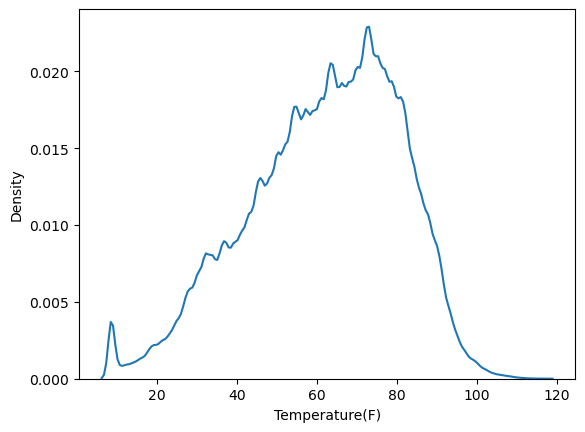

In [35]:
sns.kdeplot(data=df,x='Temperature(F)')
print(df['Temperature(F)'].min())
print(df['Temperature(F)'].max())
print(df['Temperature(F)'].mean())

we can see that the accidents happend when the temperature in f is 50- 100 and we can see the mean value is 61.66.

In [36]:
percentile25=df['Wind_Chill(F)'].quantile(0.25)
percentile75=df['Wind_Chill(F)'].quantile(0.75)
iqr=percentile75-percentile25
upperlimit=percentile75+1.5*iqr
lowerlimit=percentile25-1.5*iqr
print((df['Wind_Chill(F)']>upperlimit).sum())
print((df['Wind_Chill(F)']<lowerlimit).sum())

34
43835


In [37]:
df.loc[df['Wind_Chill(F)']>upperlimit,'Wind_Chill(F)']=upperlimit
df.loc[df['Wind_Chill(F)']<lowerlimit,'Wind_Chill(F)']=lowerlimit

-5.0
123.0
58.334969206937906


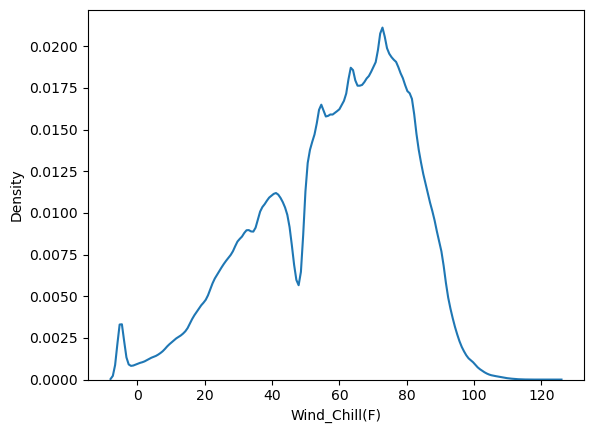

In [38]:
sns.kdeplot(data=df,x='Wind_Chill(F)')
print(df['Wind_Chill(F)'].min())
print(df['Wind_Chill(F)'].max())
print(df['Wind_Chill(F)'].mean())

we can see that the accidents happend when the wind_chill in f is 60- 100 and we can see the mean value is 58.33.

In [39]:
percentile25=df['Humidity(%)'].quantile(0.25)
percentile75=df['Humidity(%)'].quantile(0.75)
iqr=percentile75-percentile25
upperlimit=percentile75+1.5*iqr
lowerlimit=percentile25-1.5*iqr
print((df['Humidity(%)']>upperlimit).sum())
print((df['Humidity(%)']<lowerlimit).sum())

0
0


1.0
100.0
64.83104146672403


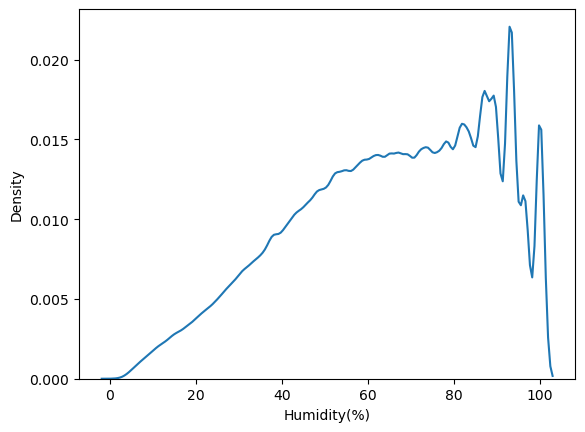

In [40]:
sns.kdeplot(data=df,x='Humidity(%)')
print(df['Humidity(%)'].min())
print(df['Humidity(%)'].max())
print(df['Humidity(%)'].mean())

we can see that the accidents happend when the humidity  is above 50 and we can see the mean value is 64.83.

In [41]:
percentile25=df['Pressure(in)'].quantile(0.25)
percentile75=df['Pressure(in)'].quantile(0.75)
iqr=percentile75-percentile25
upperlimit=percentile75+1.5*iqr
lowerlimit=percentile25-1.5*iqr
print((df['Pressure(in)']>upperlimit).sum())
print((df['Pressure(in)']<lowerlimit).sum())

113
443270


In [42]:
df.loc[df['Pressure(in)']>upperlimit,'Pressure(in)']=upperlimit
df.loc[df['Pressure(in)']<lowerlimit,'Pressure(in)']=lowerlimit

28.380000000000003
31.020000000000003
29.66544822650827


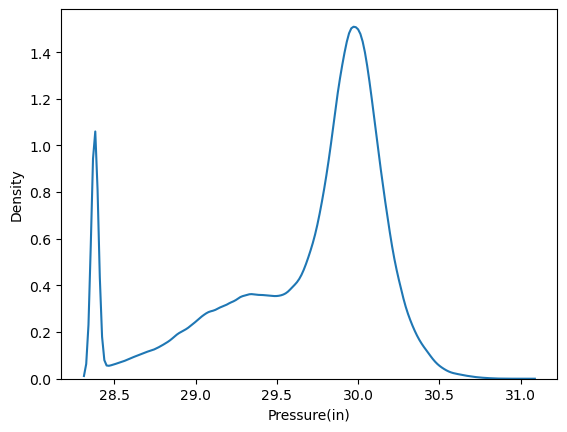

In [43]:
sns.kdeplot(data=df,x='Pressure(in)')
print(df['Pressure(in)'].min())
print(df['Pressure(in)'].max())
print(df['Pressure(in)'].mean())

we can see that the accidents happend when the pressure in (in) is 29.5- 30.5 and we can see the mean value is 29.66.

0.0
140.0
9.090376447963356


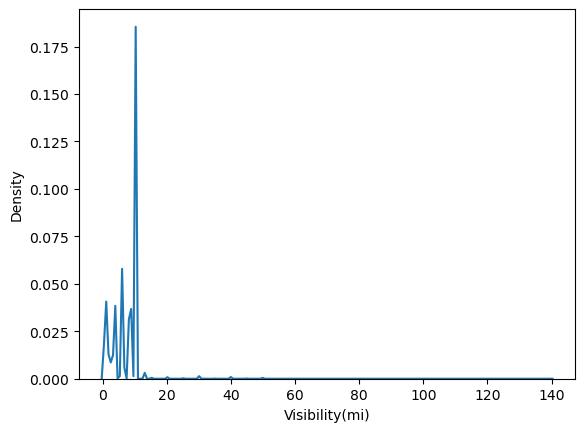

In [44]:
sns.kdeplot(data=df,x='Visibility(mi)')
print(df['Visibility(mi)'].min())
print(df['Visibility(mi)'].max())
print(df['Visibility(mi)'].mean())

we can see that the accidents happend when the visibility in mi is 10 and very less is above it and very less belowe it .we can see the mean value is 9.09.

In [45]:
percentile25=df['Visibility(mi)'].quantile(0.25)
percentile75=df['Visibility(mi)'].quantile(0.75)
iqr=percentile75-percentile25
upperlimit=percentile75+1.5*iqr
lowerlimit=percentile25-1.5*iqr
print((df['Visibility(mi)']>upperlimit).sum())
print((df['Visibility(mi)']<lowerlimit).sum())

30845
1450220


24


<Axes: xlabel='Wind_Direction'>

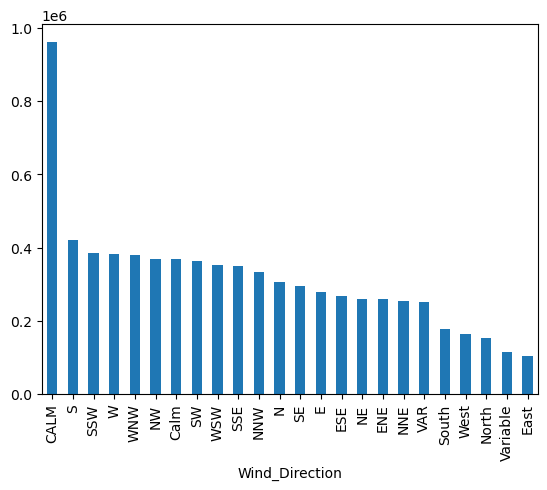

In [46]:
print(df['Wind_Direction'].nunique())
df['Wind_Direction'].value_counts().plot(kind='bar')

we can see that the accidents happend when the wind direction is mostly in calm and less during others

In [47]:
percentile25=df['Wind_Speed(mph)'].quantile(0.25)
percentile75=df['Wind_Speed(mph)'].quantile(0.75)
iqr=percentile75-percentile25
upperlimit=percentile75+1.5*iqr
lowerlimit=percentile25-1.5*iqr
print((df['Wind_Speed(mph)']>upperlimit).sum())
print((df['Wind_Speed(mph)']<lowerlimit).sum())

210603
0


In [48]:
df.loc[df['Wind_Speed(mph)']>upperlimit,'Wind_Speed(mph)']=upperlimit
df.loc[df['Wind_Speed(mph)']<lowerlimit,'Wind_Speed(mph)']=lowerlimit

0.0
19.1
7.574855910045896


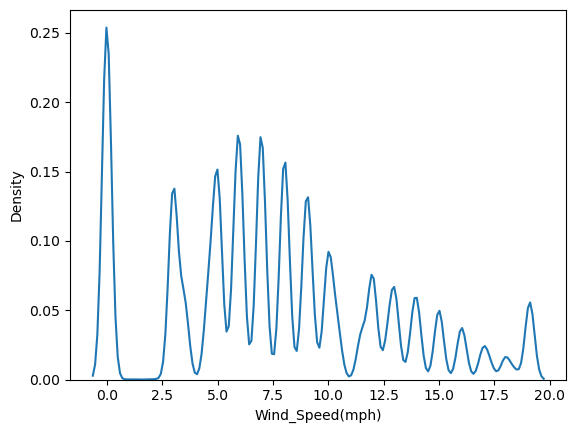

In [49]:
sns.kdeplot(data=df,x='Wind_Speed(mph)')
print(df['Wind_Speed(mph)'].min())
print(df['Wind_Speed(mph)'].max())
print(df['Wind_Speed(mph)'].mean())

we can see that the accidents happend when the wind speed in mph is between 0-20 it is almost average accidents in each range and we can see the mean value is 7.57.

In [50]:
percentile25=df['Precipitation(in)'].quantile(0.25)
percentile75=df['Precipitation(in)'].quantile(0.75)
iqr=percentile75-percentile25
upperlimit=percentile75+1.5*iqr
lowerlimit=percentile25-1.5*iqr
print((df['Precipitation(in)']>upperlimit).sum())
print((df['Precipitation(in)']<lowerlimit).sum())

533090
0


In [51]:
df.loc[df['Precipitation(in)']>upperlimit,'Precipitation(in)']=upperlimit
df.loc[df['Precipitation(in)']<lowerlimit,'Precipitation(in)']=lowerlimit

0.0
0.0
0.0


/var/folders/4k/y5tlzbvd0r7f8y3rg_n6h3gh0000gn/T/ipykernel_37193/461703333.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df,x='Precipitation(in)')


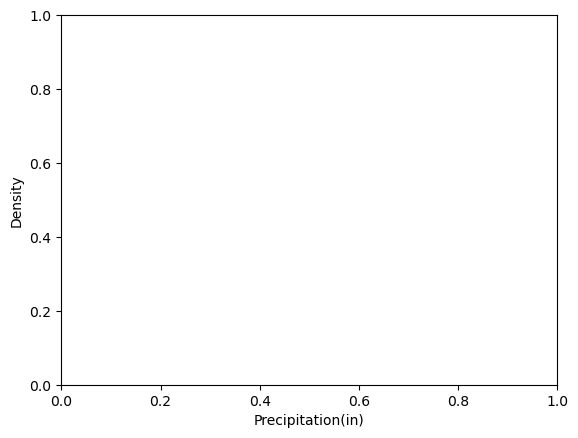

In [52]:
sns.kdeplot(data=df,x='Precipitation(in)')
print(df['Precipitation(in)'].min())
print(df['Precipitation(in)'].max())
print(df['Precipitation(in)'].mean())

precipitation is majorly 0 so the acccidents are independent of precipitation or we can say they are mostly precipitation is 0

144


<Axes: xlabel='Weather_Condition'>

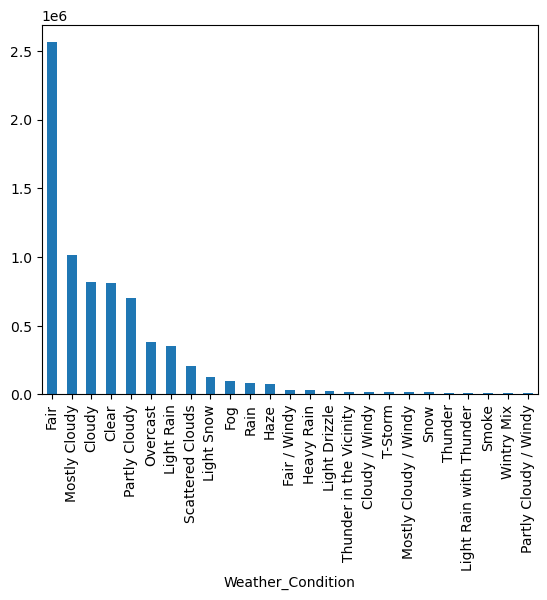

In [53]:
print(df['Weather_Condition'].nunique())
df['Weather_Condition'].value_counts().head(25).plot(kind='bar')

we can see most of the accidents take place when the weather condition is fair.

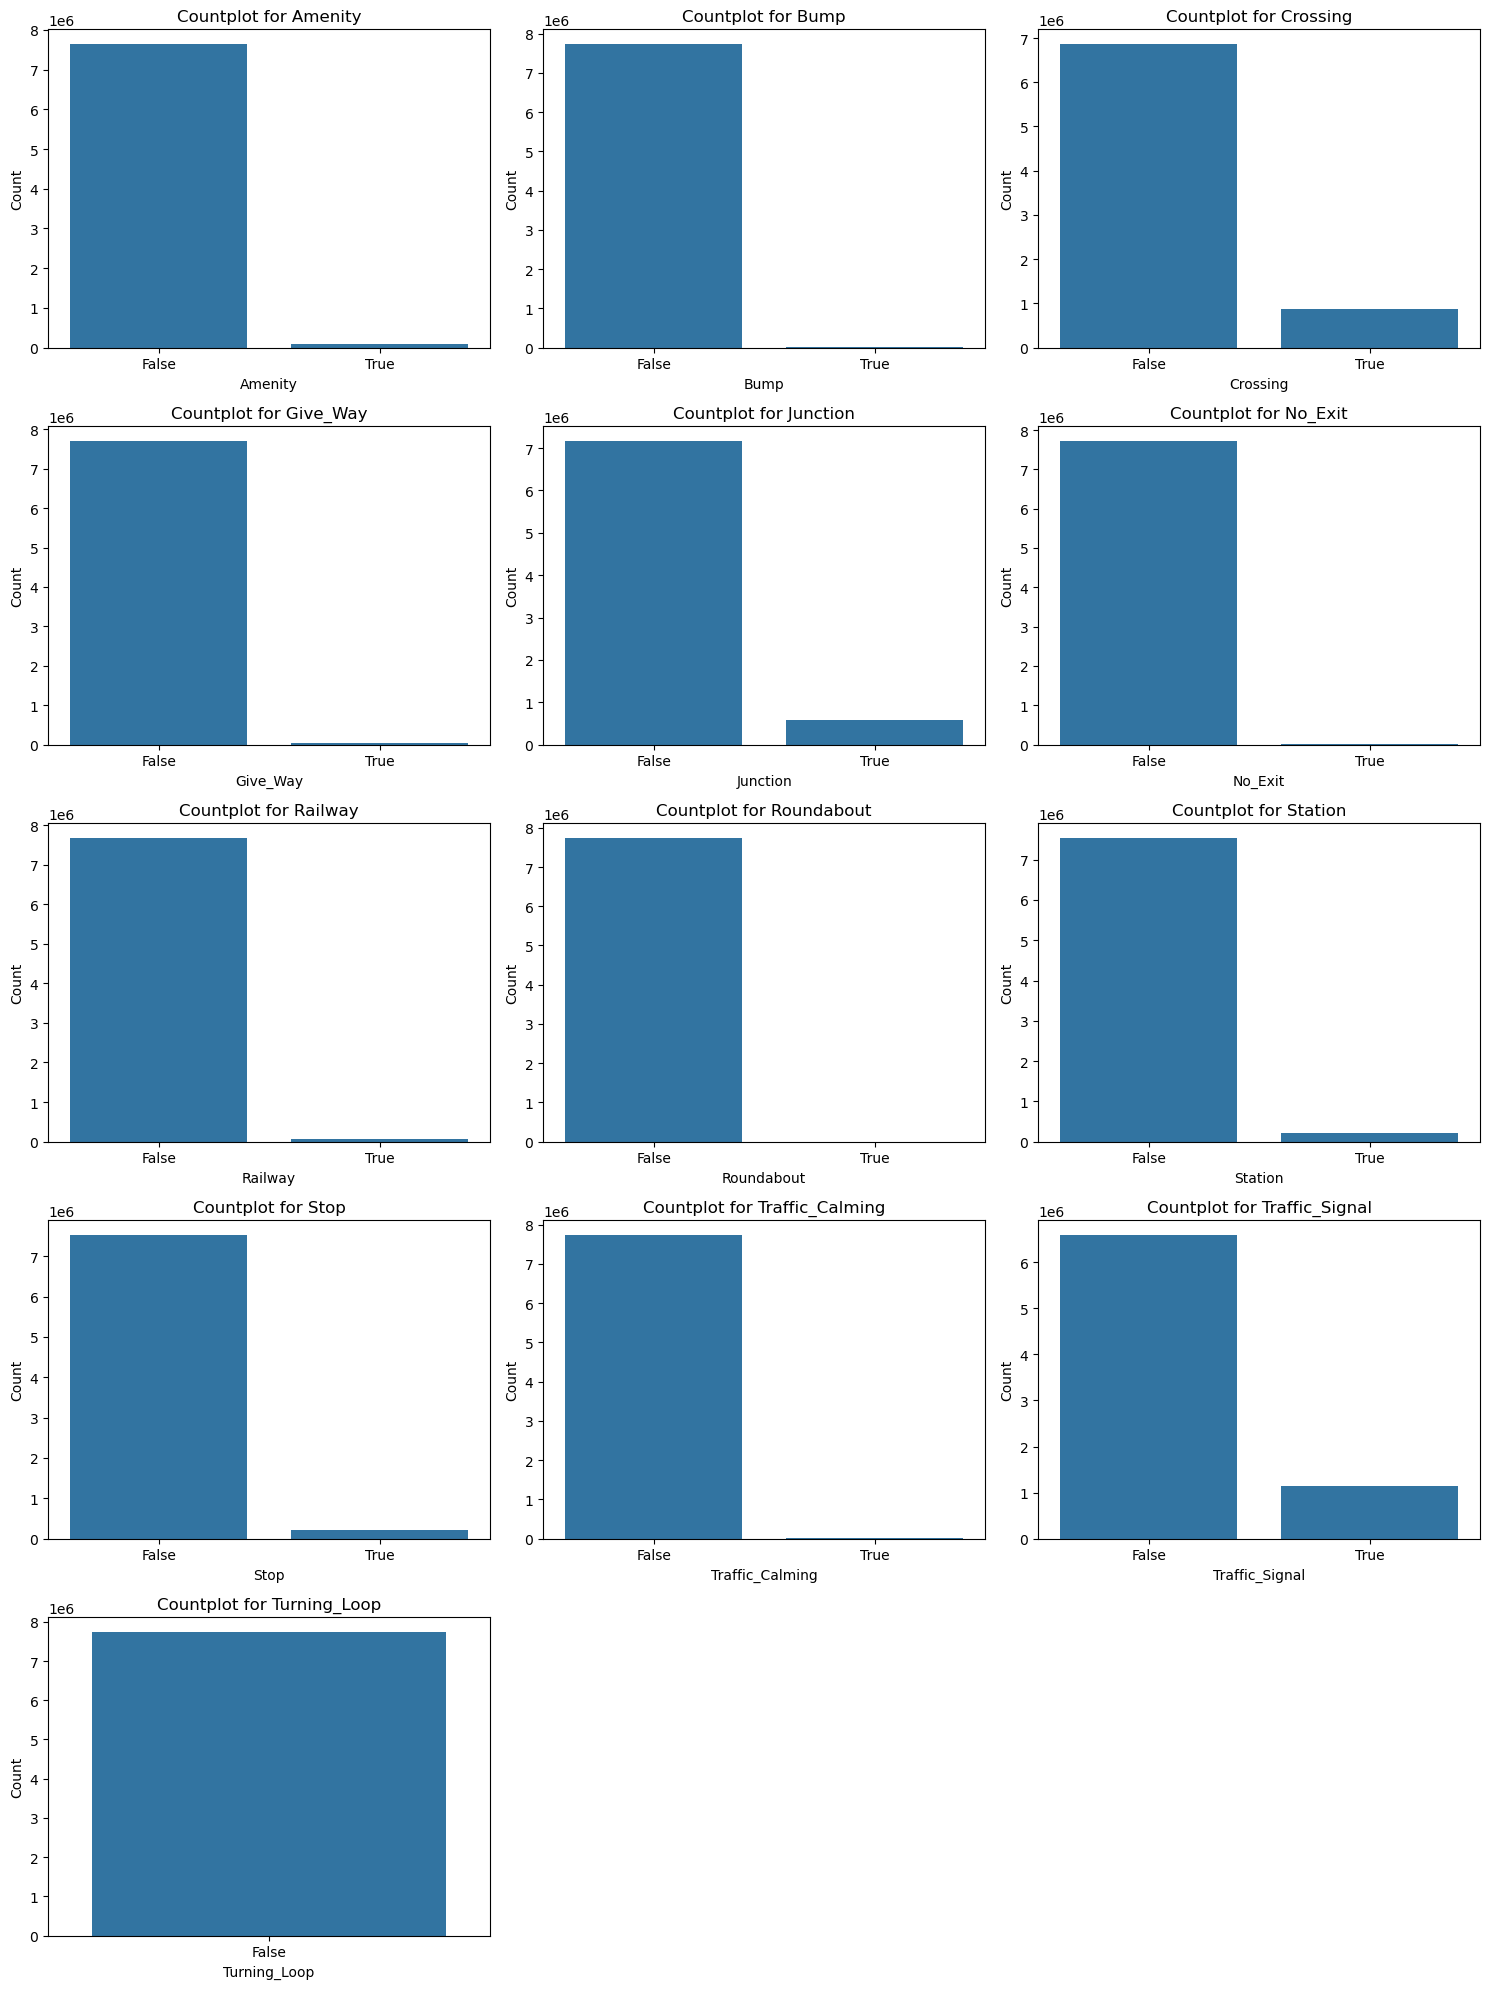

In [54]:
bool_cols = df.select_dtypes(include='bool').columns
n_cols = 3 
n_rows = (len(bool_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()
for i, col in enumerate(bool_cols):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Countplot for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

all these have mostly false so we cant say anything about accidents by these colmns.

2


<Axes: xlabel='Sunrise_Sunset'>

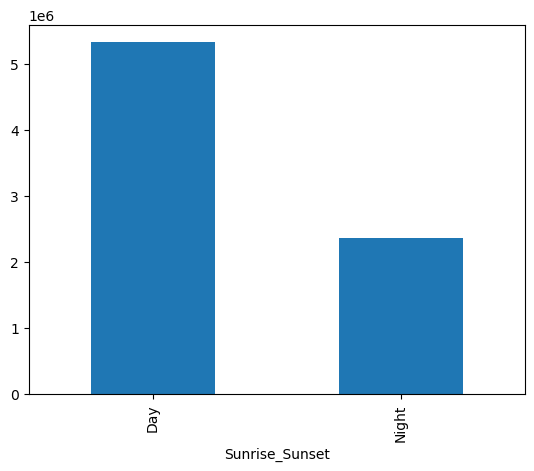

In [55]:
print(df['Sunrise_Sunset'].nunique())
df['Sunrise_Sunset'].value_counts().plot(kind='bar')

most of the accidents are at day time and half of them are at night time

2


<Axes: xlabel='Civil_Twilight'>

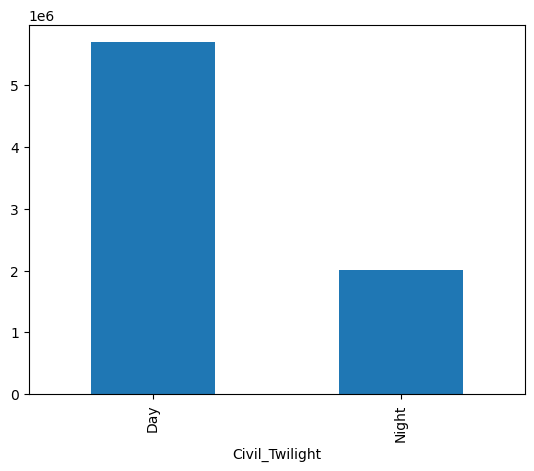

In [56]:
print(df['Civil_Twilight'].nunique())
df['Civil_Twilight'].value_counts().plot(kind='bar')

most of the accidents are at day time and half of them are at night time

2


<Axes: xlabel='Nautical_Twilight'>

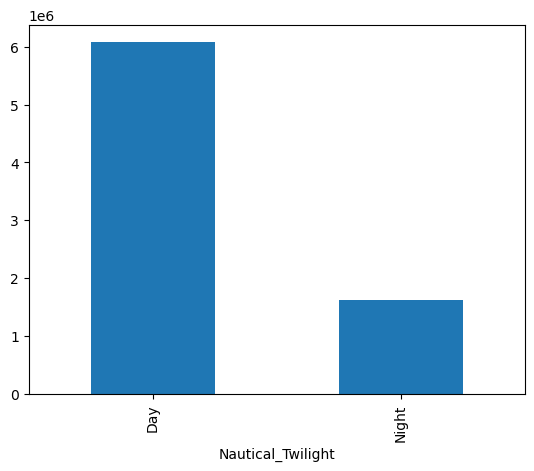

In [57]:
print(df['Nautical_Twilight'].nunique())
df['Nautical_Twilight'].value_counts().plot(kind='bar')

most of the accidents are at day time and half of them are at night time

2


<Axes: xlabel='Astronomical_Twilight'>

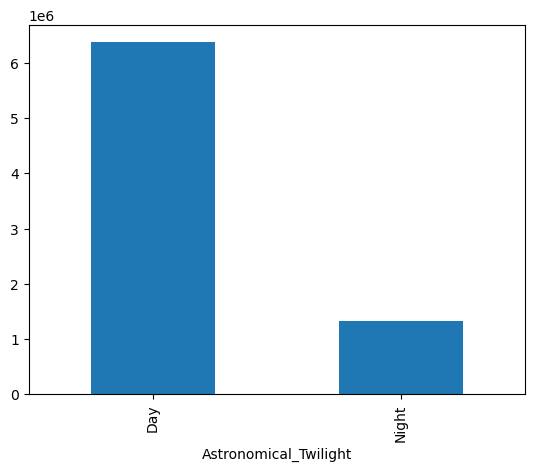

In [58]:
print(df['Astronomical_Twilight'].nunique())
df['Astronomical_Twilight'].value_counts().plot(kind='bar')

most of the accidents are at day time and half of them are at night time

In [60]:
profile=ProfileReport(df,title='accidents reports',explorative=True)
profile.to_file("reports.html") 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████| 48/48 [04:58<00:00,  6.23s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]